In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv(r"C:\Users\gowri\OneDrive\Desktop\human activity recognition\train.csv")
test_data = pd.read_csv(r"C:\Users\gowri\OneDrive\Desktop\human activity recognition\test.csv")

In [5]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [11]:
train_data.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [13]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [15]:
train_data.shape

(7352, 563)

In [17]:
test_data.shape

(2947, 563)

In [19]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [21]:
train_data['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [23]:
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

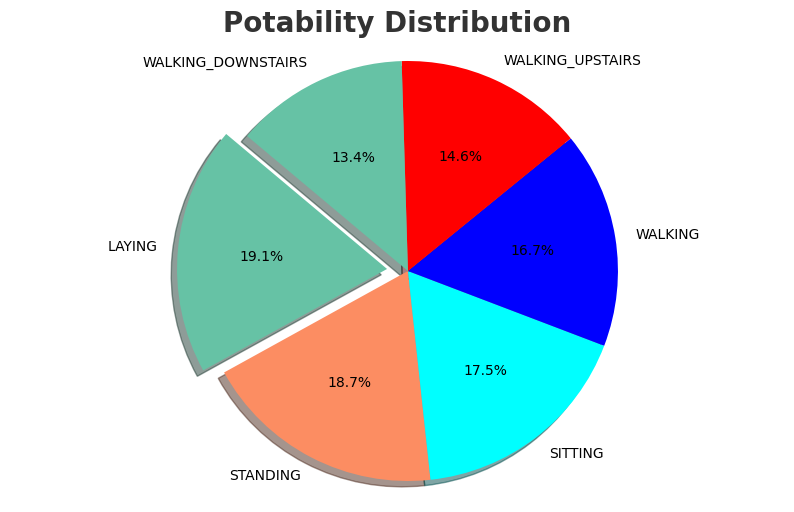

In [25]:
potability_counts = train_data['Activity'].value_counts()

colors = ['#66c2a5', '#fc8d62', 'cyan', 'blue', 'red']

explode = [0.1] + [0] * (len(potability_counts) - 1)

plt.figure(figsize=(10, 6))
plt.pie(
    potability_counts,
    labels=potability_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(potability_counts)],  
    explode=explode,
    shadow=True
)
plt.title('Potability Distribution', fontsize=20, fontweight='bold', color='#333333')
plt.axis('equal')
plt.show()

In [27]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [29]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [31]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [33]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from sklearn.metrics import accuracy_score

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [39]:
num_classes = len(np.unique(y_train))
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## ConvLSTM Model:

In [42]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 559, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 559, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 35776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,579,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,613,510 (17.60 MB)

 Trainable params: 4,613,510 (17.60 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(x_train, y_train_onehot, validation_split=0.2, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 855ms/step - accuracy: 0.5402 - loss: 1.0038 - val_accuracy: 0.9035 - val_loss: 0.2633
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 824ms/step - accuracy: 0.8914 - loss: 0.2786 - val_accuracy: 0.9415 - val_loss: 0.1576
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 839ms/step - accuracy: 0.9327 - loss: 0.1723 - val_accuracy: 0.9511 - val_loss: 0.1497
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 832ms/step - accuracy: 0.9532 - loss: 0.1164 - val_accuracy: 0.9483 - val_loss: 0.1510
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 848ms/step - accuracy: 0.9600 - loss: 0.1005 - val_accuracy: 0.9429 - val_loss: 0.1509
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 870ms/step - accuracy: 0.9683 - loss: 0.0788 - val_accuracy: 0.9334 - val_loss: 0.1522
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 845ms/step - accuracy: 0.9723 - loss: 0.0710 - val_accuracy: 0.9572 - val_loss: 0.1193
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 838ms/step - accuracy: 0.9731 - loss: 0.0659 - val_accu

In [51]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step
Accuracy: 0.94


In [53]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.80      0.88       491
           2       0.84      0.98      0.91       532
           3       0.96      0.99      0.97       496
           4       0.98      0.88      0.93       420
           5       0.90      0.97      0.94       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



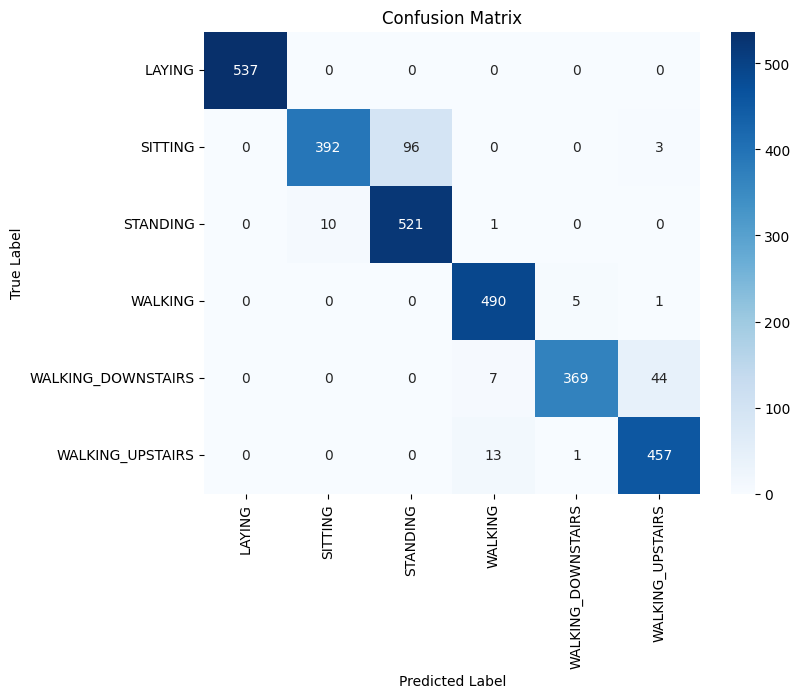

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

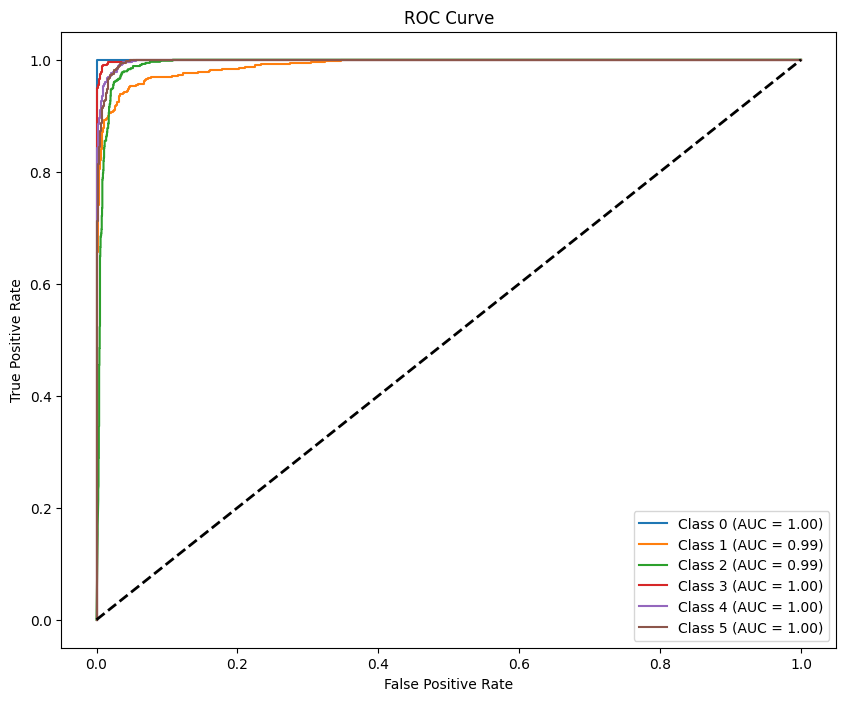

In [57]:
fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_onehot[:, i], y_pred_prob[:, i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [59]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
auc_macro = roc_auc_score(y_test_onehot, y_pred_prob, multi_class="ovr")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Matthews Correlation Coefficient: {mcc:.2f}")
print(f"AUC-ROC (Macro): {auc_macro:.2f}")

Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Matthews Correlation Coefficient: 0.93
AUC-ROC (Macro): 1.00


## CNN Model Implementation

In [84]:
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 559, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 559, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 35776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,579,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,840,532 (52.80 MB)

 Trainable params: 4,613,510 (17.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,227,022 (35.20 MB)

In [64]:
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

cnn_model = build_cnn(x_train_cnn.shape[1:], len(np.unique(y_train)))
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=20, batch_size=64, validation_data=(x_test_cnn, y_test))

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.6577 - loss: 0.8575 - val_accuracy: 0.8816 - val_loss: 0.2962
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9303 - loss: 0.2039 - val_accuracy: 0.9396 - val_loss: 0.1720
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9471 - loss: 0.1437 - val_accuracy: 0.9253 - val_loss: 0.1810
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9688 - loss: 0.0963 - val_accuracy: 0.9508 - val_loss: 0.1386
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9714 - loss: 0.0813 - val_accuracy: 0.9393 - val_loss: 0.1641
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9693 - loss: 0.0768 - val_accuracy: 0.9447 - val_loss: 0.1653
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9719 - loss: 0.0768 - val_accuracy: 0.9535 - val_loss: 0.1291
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9712 - loss: 0.0684 - val_acc

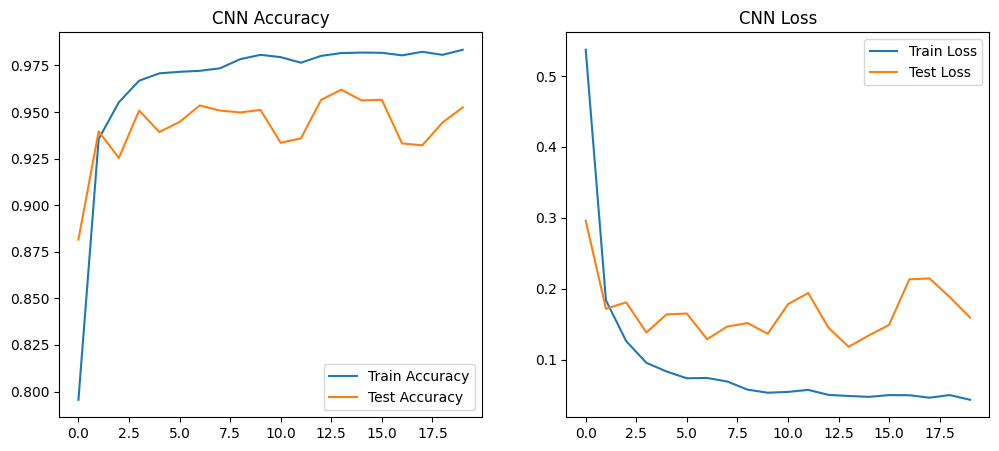

CNN Train Accuracy: 0.9905, Test Accuracy: 0.9525


In [66]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()
    
plot_history(cnn_history, "CNN")

train_acc_cnn = cnn_model.evaluate(x_train_cnn, y_train, verbose=0)[1]
test_acc_cnn = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)[1]
print(f'CNN Train Accuracy: {train_acc_cnn:.4f}, Test Accuracy: {test_acc_cnn:.4f}')

## LSTM Model Implementation

In [69]:
def build_lstm(input_shape, num_classes):
    model = Sequential([
        LSTM(100, input_shape=input_shape, return_sequences=True),
        LSTM(100),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 559, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 559, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 35776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,579,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,840,532 (52.80 MB)

 Trainable params: 4,613,510 (17.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,227,022 (35.20 MB)

In [75]:
x_train_lstm = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_lstm = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

lstm_model = build_lstm(x_train_lstm.shape[1:], len(np.unique(y_train)))
lstm_history = lstm_model.fit(x_train_lstm, y_train, epochs=20, batch_size=64, validation_data=(x_test_lstm, y_test))

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 540s 5s/step - accuracy: 0.2872 - loss: 1.5002 - val_accuracy: 0.4262 - val_loss: 1.0793
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 506s 4s/step - accuracy: 0.4213 - loss: 1.0757 - val_accuracy: 0.4595 - val_loss: 1.0265
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 511s 4s/step - accuracy: 0.4625 - loss: 1.0221 - val_accuracy: 0.4666 - val_loss: 1.0256
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 515s 4s/step - accuracy: 0.4764 - loss: 1.0264 - val_accuracy: 0.4744 - val_loss: 1.0491
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 515s 4s/step - accuracy: 0.4890 - loss: 0.9868 - val_accuracy: 0.4869 - val_loss: 1.0106
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 520s 5s/step - accuracy: 0.5069 - loss: 0.9670 - val_accuracy: 0.4632 - val_loss: 1.0042
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 525s 5s/step - accuracy: 0.5067 - loss: 0.9649 - val_accuracy: 0.5025 - val_loss: 0.9736
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 529s 5s/step - accuracy: 0.5081 - loss: 0.9515 - val_accu

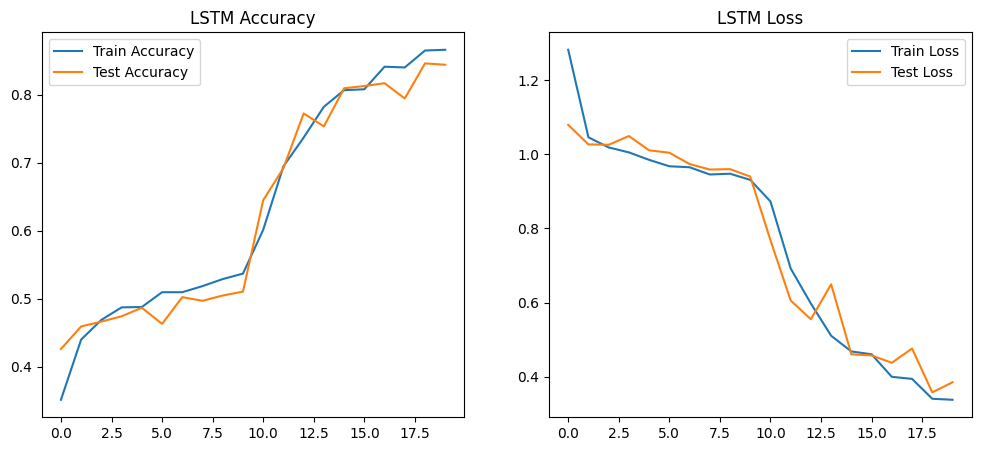

LSTM Train Accuracy: 0.8878, Test Accuracy: 0.8442


In [76]:
plot_history(lstm_history, "LSTM")

train_acc_lstm = lstm_model.evaluate(x_train_lstm, y_train, verbose=0)[1]
test_acc_lstm = lstm_model.evaluate(x_test_lstm, y_test, verbose=0)[1]
print(f'LSTM Train Accuracy: {train_acc_lstm:.4f}, Test Accuracy: {test_acc_lstm:.4f}')

## CNN-LSTM Model Implementation

In [78]:
def build_cnn_lstm(input_shape, num_classes):
    model = Sequential([
        TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=input_shape),
        TimeDistributed(MaxPooling1D(pool_size=2)),
        TimeDistributed(Flatten()),
        LSTM(100),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 559, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 559, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 559, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 35776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,579,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,840,532 (52.80 MB)

 Trainable params: 4,613,510 (17.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,227,022 (35.20 MB)

In [80]:
x_train_cnn_lstm = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], 1)
x_test_cnn_lstm = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], 1)

cnn_lstm_model = build_cnn_lstm(x_train_cnn_lstm.shape[1:], len(np.unique(y_train)))
cnn_lstm_history = cnn_lstm_model.fit(x_train_cnn_lstm, y_train, epochs=10, batch_size=64, validation_data=(x_test_cnn_lstm, y_test))

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.5441 - loss: 1.0087 - val_accuracy: 0.9036 - val_loss: 0.2337
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.9256 - loss: 0.1948 - val_accuracy: 0.9203 - val_loss: 0.1872
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.9598 - loss: 0.1078 - val_accuracy: 0.9284 - val_loss: 0.1929
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.9722 - loss: 0.0811 - val_accuracy: 0.9396 - val_loss: 0.1801
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.9750 - loss: 0.0690 - val_accuracy: 0.9532 - val_loss: 0.1480
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.9838 - loss: 0.0521 - val_accuracy: 0.9423 - val_loss: 0.1811
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.9813 - loss: 0.0536 - val_accuracy: 0.9454 - val_loss: 0.1807
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.9853 - loss: 0

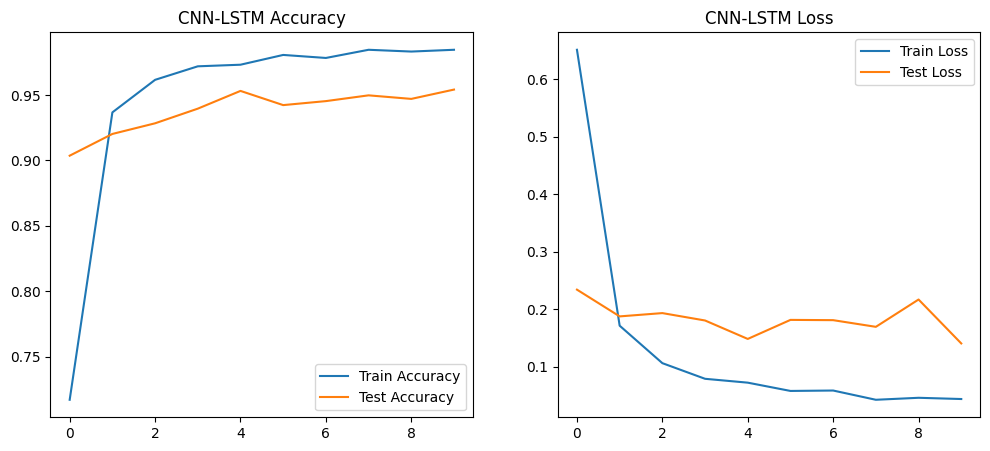

CNN-LSTM Train Accuracy: 0.9894, Test Accuracy: 0.9542


In [81]:
plot_history(cnn_lstm_history, "CNN-LSTM")

train_acc_cnn_lstm = cnn_lstm_model.evaluate(x_train_cnn_lstm, y_train, verbose=0)[1]
test_acc_cnn_lstm = cnn_lstm_model.evaluate(x_test_cnn_lstm, y_test, verbose=0)[1]
print(f'CNN-LSTM Train Accuracy: {train_acc_cnn_lstm:.4f}, Test Accuracy: {test_acc_cnn_lstm:.4f}')

In [82]:
print(f'CNN Train Accuracy: {train_acc_cnn:.4f}, Test Accuracy: {test_acc_cnn:.4f}')
print(f'LSTM Train Accuracy: {train_acc_lstm:.4f}, Test Accuracy: {test_acc_lstm:.4f}')
print(f'CNN-LSTM Train Accuracy: {train_acc_cnn_lstm:.4f}, Test Accuracy: {test_acc_cnn_lstm:.4f}')

CNN Train Accuracy: 0.9905, Test Accuracy: 0.9525
LSTM Train Accuracy: 0.8878, Test Accuracy: 0.8442
CNN-LSTM Train Accuracy: 0.9894, Test Accuracy: 0.9542
